In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
from mpl_toolkits.mplot3d import Axes3D
from smt.sampling_methods import LHS
from dside import DSI
from kernel_opt_fun import *

In [2]:
# Define the objective function
def f(X):
    #expl4
    return (4 - 2.1 * X[:, 0]**2 + 1/3 * X[:, 0]**4) * X[:, 0]**2 + X[:, 0] *X[:, 1] + (-4 + 4 * X[:, 1]**2) * X[:, 1]**2

In [3]:
#Generate LHS training samples

xlimits = np.array([
    [-1,1],
    [-1,1],
])
sampling = LHS(xlimits=xlimits, criterion='ese')

n = 31
x_LHS = sampling(n)

# Create input X arrays
X1 = x_LHS[:,0]
X2 = x_LHS[:,1]
X = np.vstack((X1.flatten(), X2.flatten())).T 

Y = f(X).reshape(-1, 1)


In [5]:
# Create and train the GP model

best_kernel, best_mea = find_best_kernel(X, Y, input_dim=2) 
#MAE = 0.00002 MAPE = 0.05%

print("Best kernel:", kernel_to_str(best_kernel))
print(f"Best MEA: {best_mea:.3f}")
model = GPy.models.GPRegression(X, Y, best_kernel)


reconstraining parameters std_periodic.lengthscale
reconstraining parameters std_periodic.variance
reconstraining parameters std_periodic.period


Kernel: rbf + rbf_1, MAE: 0.15061071442855026
Kernel: rbf * rbf_1, MAE: 0.1506106838063055
Kernel: rbf + linear, MAE: 0.15061185001506391
Kernel: rbf * linear, MAE: 0.10449206872658022
Kernel: rbf + RatQuad, MAE: 0.14727798300366501
Kernel: rbf * RatQuad, MAE: 0.1506134772492562
Kernel: rbf + std_periodic, MAE: 0.02569459520557606
Kernel: rbf * std_periodic, MAE: 0.07895282314598746
Kernel: linear + rbf, MAE: 0.15061185001508282
Kernel: linear * rbf, MAE: 0.10449206872659024
Kernel: linear + linear_1, MAE: 0.7806222080044878
Kernel: linear * linear_1, MAE: 0.3111389686022158
Kernel: linear + RatQuad, MAE: 0.12688784805731115
Kernel: linear * RatQuad, MAE: 0.09310391614869629
Kernel: linear + std_periodic, MAE: 0.09494177976982777
Kernel: linear * std_periodic, MAE: 0.09082365605003959
Kernel: RatQuad + rbf, MAE: 0.14727798299994102
Kernel: RatQuad * rbf, MAE: 0.15061517019158105
Kernel: RatQuad + linear, MAE: 0.12688784803475828
Kernel: RatQuad * linear, MAE: 0.09310391614867579
Kernel

 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\GPy\kern\src\stationary.py:774: RuntimeWarning:overflow encountered in square
 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\GPy\kern\src\stationary.py:779: RuntimeWarning:overflow encountered in square
 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\GPy\kern\src\stationary.py:786: RuntimeWarning:overflow encountered in square
 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\GPy\kern\src\stationary.py:788: RuntimeWarning:invalid value encountered in multiply


Kernel: std_periodic + RatQuad + RatQuad_1, MAE: 0.024614398543196248
Kernel: std_periodic + RatQuad * RatQuad, MAE: 0.01377607309380031
Kernel: std_periodic + RatQuad + std_periodic_1, MAE: 0.027938518953136784
Kernel: std_periodic + RatQuad * std_periodic, MAE: 0.19215083957516188
Kernel: std_periodic + RatQuad * linear + rbf, MAE: 0.01063132964477742
Kernel: std_periodic + RatQuad * linear * rbf, MAE: 0.00928509824834394
Kernel: std_periodic + RatQuad * linear + linear, MAE: 0.010628937756475776
Kernel: std_periodic + RatQuad * linear * linear_1, MAE: 0.006082139090489634
Kernel: std_periodic + RatQuad * linear + RatQuad, MAE: 0.06926537521769319
Kernel: std_periodic + RatQuad * linear * RatQuad, MAE: 0.009275890588914617
Kernel: std_periodic + RatQuad * linear + std_periodic, MAE: 0.02451250129211256
Kernel: std_periodic + RatQuad * linear * std_periodic, MAE: 0.0513201446864044
Kernel: std_periodic + RatQuad * linear * linear_1 + rbf, MAE: 0.30538605440098937
Kernel: std_periodic 

 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1
 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: std_periodic + RatQuad * linear * linear_1 * rbf + rbf, MAE: 0.3053817646771802
Kernel: std_periodic + RatQuad * linear * linear_1 * rbf * rbf_1, MAE: 0.3134190393194273
Kernel: std_periodic + RatQuad * linear * linear_1 * rbf + linear, MAE: 0.31341479808550093
Kernel: std_periodic + RatQuad * linear * linear_1 * rbf * linear_2, MAE: 0.45986171936898607


 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1
 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1
 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: std_periodic + RatQuad * linear * linear_1 * rbf + RatQuad, MAE: 0.08835304412021458
Kernel: std_periodic + RatQuad * linear * linear_1 * rbf * RatQuad, MAE: 0.2948002233888903
Kernel: std_periodic + RatQuad * linear * linear_1 * rbf + std_periodic, MAE: 0.017963452975576697


 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1
 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: std_periodic + RatQuad * linear * linear_1 * rbf * std_periodic, MAE: 0.22692922121567843

Results of each iteration:
Iteration 1: Best Kernel: std_periodic + RatQuad, MAE: 0.02567
Iteration 2: Best Kernel: std_periodic + RatQuad * linear, MAE: 0.00968
Iteration 3: Best Kernel: std_periodic + RatQuad * linear * linear_1, MAE: 0.00608
Iteration 4: Best Kernel: std_periodic + RatQuad * linear * linear_1 * rbf, MAE: 0.00608
Iteration 5: Best Kernel: std_periodic + RatQuad * linear * linear_1 * rbf + std_periodic, MAE: 0.01796
Best kernel: std_periodic + RatQuad * linear * linear_1
Best MEA: 0.006


 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [6]:

model.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0001   4.842789e+01   5.808155e+01 
    00s02  0006   1.449125e+09   1.639424e-114 
    00s03  0019   2.837429e+01   5.615957e+02 
    00s07  0038  -2.919249e+01   1.151988e+01 
    00s08  0049  -4.026715e+01   8.560663e-01 
    00s10  0054  -4.042976e+01   4.077799e-03 
    00s10  0057  -4.043032e+01   8.981004e-06 
    00s10  0059  -4.043033e+01   2.843359e-08 
    00s15  0085  -4.043033e+01   2.843359e-08 
Runtime:     00s15
Optimization status: Converged



In [7]:

# # #Re-generate sample points for plotting (finer grid)
n = 100

#for plotting linspace is most convinient 
X1 = np.linspace(-1, 1, n) 
X2 = np.linspace(-1, 1, n)

X1, X2 = np.meshgrid(X1, X2)

X = np.vstack((X1.flatten(), X2.flatten())).T
Y = f(X).reshape(-1, 1)
# Step 4: Predict
X_pred = X
Y_pred, Y_pred_var = model.predict(X_pred)

# Reshape for plotting
Y_pred = Y_pred.reshape(X1.shape)
Y_true = f(X_pred).reshape(X1.shape)


In [8]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error 

MAE = mean_absolute_error(Y_true, Y_pred)
print(f"MAE = {MAE:.5f}")

MAE = 0.00070
MAPE = 0.26%


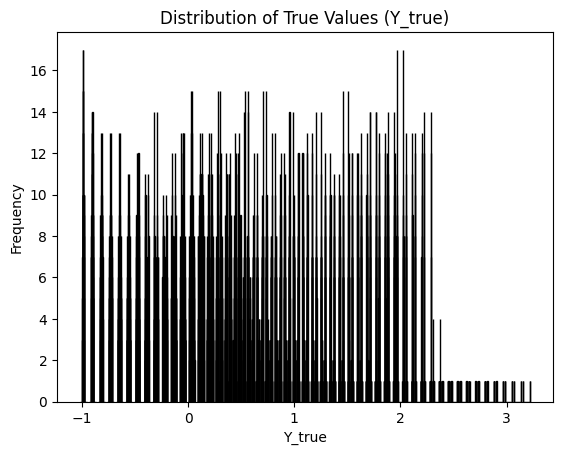

In [9]:
import matplotlib.pyplot as plt

# Plot the distribution of Y_true
plt.hist(Y_true, bins=50, edgecolor='black')
plt.title("Distribution of True Values (Y_true)")
plt.xlabel("Y_true")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Calculate the percentage of small values baaed on Ytrue
threshold = 1e-3
percentsmallY = percentage_small_values(Y_true, threshold)

print(f"Percentage of small true values (|Y_true| < {threshold}): {percentsmallY:.2f}%")


Percentage of small true values (|Y_true| < 0.001): 14.00%


In [11]:
# Calculate custom MAPE
custom_MAPE = custom_mape(Y_true, Y_pred)
print(f"Custom MAPE = {custom_MAPE:.2f}%")

Custom MAPE = 0.60%


In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2score = r2_score(Y_true, Y_pred)
MSE = mean_squared_error(Y_true, Y_pred)
print(f"R2 = {R2score:.2f}")
print(f"MSE = {MSE:.5f}")

R2 = 1.00
MSE = 0.00000


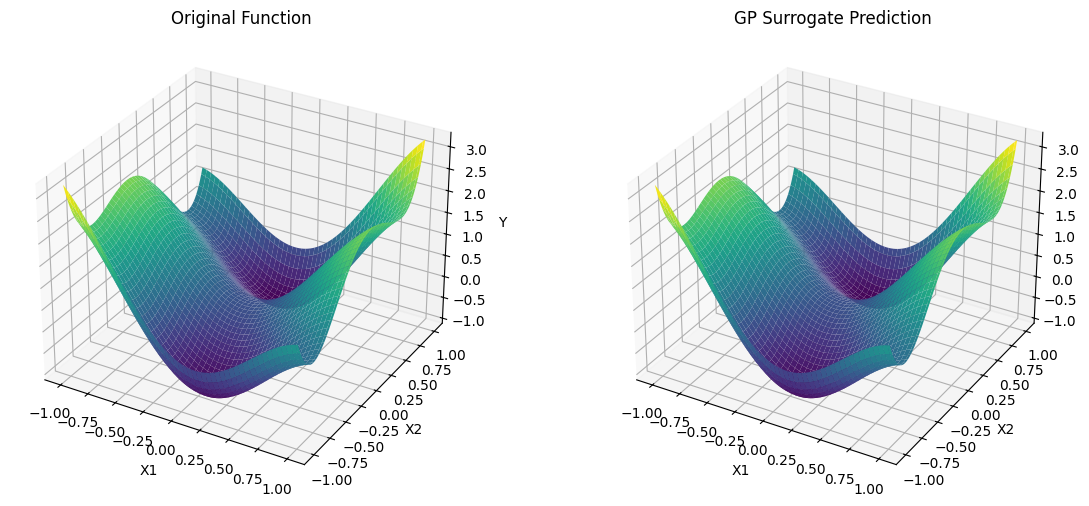

In [13]:

# Plotting
fig = plt.figure(figsize=(14, 6))

# Original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Y_true, cmap='viridis')
ax1.set_title('Original Function')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# Surrogate model prediction
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1, X2, Y_pred, cmap='viridis')
ax2.set_title('GP Surrogate Prediction')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')

plt.show()

Text(0.5, 0, 'Y')

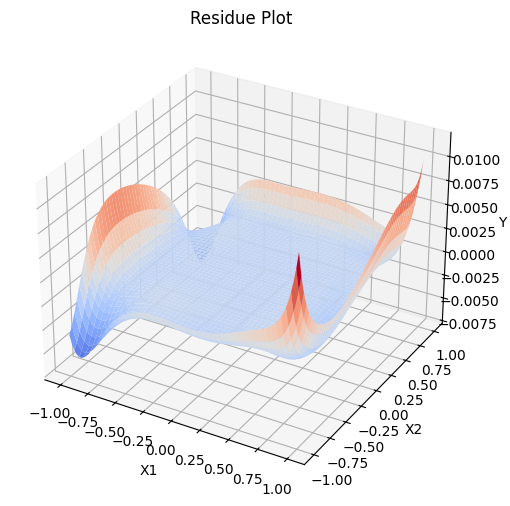

In [14]:
# Residual Plotting
fig = plt.figure(figsize=(14, 6))

# Original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Y_true-Y_pred, cmap='coolwarm')
ax1.set_title('Residue Plot')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

In [15]:
# #regenerating with Sobol
lbd = [-1, -1]
ubd = [1,1]
pwr = 13
#no_samples=4096*4
X = Sobol_sequence(lbd, ubd, pwr)
X1 = np.array(X[:,0])
X2 = np.array(X[:,1])

X = np.vstack((X1.flatten(), X2.flatten())).T
Y = f(X).reshape(-1, 1)
# Step 4: Predict
X_pred = X
Y_pred, Y_pred_var = model.predict(X_pred)
Y_true = Y
# Flatten the arrays
X1_flat = X1.flatten()
X2_flat = X2.flatten()
Y_true_flat = Y_true.flatten()
Y_pred_flat = Y_pred.flatten()

#feasibility constraint 
#G1 = (-np.sin(4 * np.pi * X1_flat)) + 2 * (np.sin(2 * np.pi * X2_flat))**2

# Create a DataFrame
data = {
    'X1': X1_flat,
    'X2': X2_flat,
    'Y_true': Y_true_flat,
    'Y_pred': Y_pred_flat,
    #'G1': G1
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

            X1       X2    Y_true    Y_pred
0    -1.000000 -1.00000  3.233333  3.236702
1     0.000000  0.00000  0.000000  0.000000
2     0.500000 -0.50000 -0.126042 -0.126076
3    -0.500000  0.50000 -0.126042 -0.126269
4    -0.250000 -0.25000  0.070003  0.070037
...        ...      ...       ...       ...
8187 -0.249756  0.81665 -0.851095 -0.851115
8188 -0.499756 -0.43335  0.479688  0.479576
8189  0.500244  0.56665  0.286189  0.286126
8190  0.000244 -0.93335 -0.449244 -0.449335
8191 -0.999756  0.06665  2.148618  2.142375

[8192 rows x 4 columns]


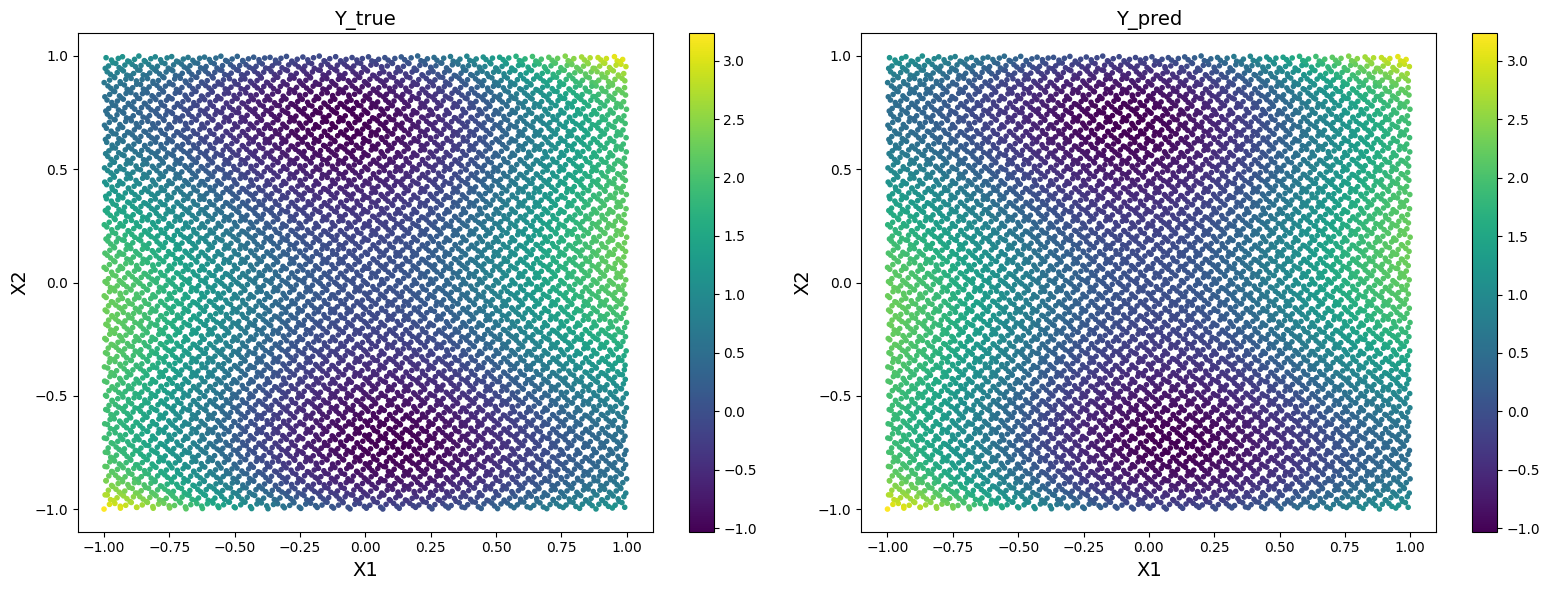

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Adjusted figsize for better layout
fs = 14
# Scatter plot for Y_true
sc1 = ax[0].scatter(df['X1'], df['X2'], c=df['Y_true'], marker='.', cmap='viridis')
cbar1 = fig.colorbar(sc1, ax=ax[0])
ax[0].set_title('Y_true', fontsize=fs)
ax[0].set_xlabel('X1', fontsize=fs)
ax[0].set_ylabel('X2', fontsize=fs)
ax[0].set_yticks([-1, -0.5, 0, 0.5, 1])

# Scatter plot for Y_pred
sc2 = ax[1].scatter(df['X1'], df['X2'], c=df['Y_pred'], marker='.', cmap='viridis')
cbar2 = fig.colorbar(sc2, ax=ax[1])
ax[1].set_title('Y_pred', fontsize=fs)
ax[1].set_xlabel('X1', fontsize=fs)
ax[1].set_ylabel('X2', fontsize=fs)
ax[1].set_yticks([-1, -0.5, 0, 0.5, 1])

plt.tight_layout()
plt.show()

In [17]:
# Define our design input labels
vn = ['X1', 'X2']


# Define the KPI constraints as a dictionary
df['G1'] = (-np.sin(4 * np.pi * X1_flat)) + 2 * (np.sin(2 * np.pi * X2_flat))**2
u = -0
constraints = {'Y_pred': [-0.9711, 1e20], 'G1': [-1e20, u]}

# Initialize the design space entity
ds = DSI(df)
# Apply the constraints separating the satisfied and violated points
ds.screen(constraints)
# Finding the design space (alpha shape)
ds.find_DSp(vn)



Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |        True        |        5646        |     2.500e+00      
    2     |     1.250e+00      |        True        |        5641        |     1.250e+00      
    3     |     6.250e-01      |        True        |        5637        |     6.250e-01      
    4     |     3.125e-01      |        True        |        5599        |     3.125e-01      
    5     |     1.562e-01      |        True        |        5486        |     1.562e-01      
    6     |     7.812e-02      |        True        |        667         |     7.812e-02      

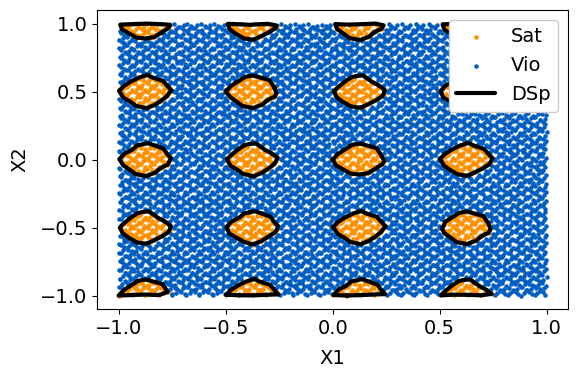

Check for violations inside design space:
Empty DataFrame
Columns: [X1, X2, Y_true, Y_pred, G1, SatFlag]
Index: []


In [18]:

# Plot the design space
ds.plot()
plt.show()

# Check if there are any violated points in the design space
print('Check for violations inside design space:')
print(ds.vindsp)

In [20]:
YpredFlag = np.array(ds.df['SatFlag'], dtype=int)
YpredFlag

array([1, 1, 0, ..., 0, 0, 0])

In [21]:
#geenrating the satflag list with the true Y

constraintsT = {'Y_true': [-0.9711, 1e20], 'G1': [-1e20, u]}

# Initialize the design space entity
dsT = DSI(df)
# Apply the constraints separating the satisfied and violated points
dsT.screen(constraintsT)

YtrueFlag = np.array(dsT.df['SatFlag'], dtype=int)
YtrueFlag

array([1, 1, 0, ..., 0, 0, 0])

In [22]:

metrics = evaluate_metrics(YtrueFlag, YpredFlag)
print(metrics)

[[6716    0]
 [   0 1476]]
{'Confusion Matrix': array([[6716,    0],
       [   0, 1476]], dtype=int64), 'Accuracy': 1.0, 'Recall': 1.0, 'Precision': 1.0, 'F1 Score': 1.0}
